In [1]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy import optimize
import matplotlib.pyplot as plt
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=16)

In [2]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/DOSCode/"
fname='DOSND1500kmax0.20T0.03BilayerMum150p150d002Dl120ABC.dat'
data=np.loadtxt(dpath + fname)

a4 = np.reshape(data, (241, -1))

In [3]:
with open('/home/aghazary/Documents/StonerBilayerData/'+'U0.0KV0.0KDataABGrapheneABC.npy', 'wb') as f:
    np.save(f, a4)

In [54]:
dpath = "/home/aghazary/Documents/StonerBilayerData/"
with open(dpath+'U0.0KV0.0KDataBilayerABC.npy', 'rb') as f:
    a4 = np.load(f)
dmu = 0.002
a=2.46
Dlist =np.arange(0,120.1,0.5)#np.arange(0,100.1,0.5)
mul = np.arange(-150,150.0001,dmu)#np.arange(-120,120.0001,dmu)
mul = mul[1:-1]
nuT0 = a4[:,1:-1]
dos0 = (a4[:,2:]-a4[:,0:-2]) / (2*dmu)
fdt = np.array([interp1d(nuT0[i], mul, kind='linear') for i in range(len(nuT0))])

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


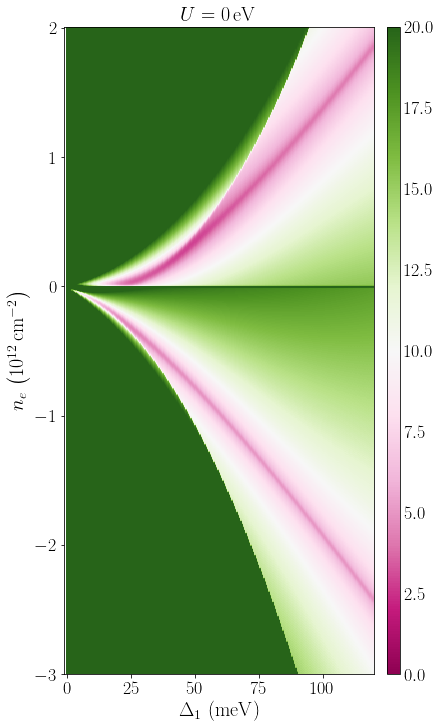

In [28]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=18)
ml.rcParams['figure.figsize'] = (6.0, 10.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
Dlist =np.arange(0,120.1,0.5)
ax1 = fig.add_subplot(gs[0, 0])
fdt = np.array([interp1d(nuT0[i], dos0[i], kind='linear') for i in range(len(nuT0))])
nul = np.arange(-3.0,2.01,0.001)
Dfl = np.arange(0,120+0.1,0.5)
ind = np.where(np.abs(np.abs(Dfl[-1])-Dlist)<0.01)[0][0]
Au = np.sqrt(3) * a**2 / 2
Cpl = (10 / Au)*np.array([1/(0.0002+fdt[i](nul)) for i in range(ind+1)])
vmax = np.amax(Cpl)
vmin = np.amin(Cpl)
cmap = plt.get_cmap('PiYG')
xi, yi = np.meshgrid(Dfl,nul)
vml = 0.0
vxl = 20.0
pc =ax1.pcolormesh(xi,yi,np.transpose(Cpl),cmap=cmap,vmin=vml,vmax=vxl,rasterized=True)
ax1.set_xlim([Dfl[0]-1.0,Dfl[-1]])
ax1.set_ylim([nul[0],nul[-1]])
ax1.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
ax1.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=20)
ax1.set_title(r'$U=0\,\mathrm{eV}$',fontsize=20)
#cbaxes = fig.add_axes([0.86, 0.78, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="vertical",aspect=30)
cbar.ax.tick_params(size=0)
#plt.tight_layout()
plt.savefig("PhaseDiagram.png", dpi=300)

In [2]:
#g0 = 2610
#g1 = 361
#g3 = 283
#g4 = 138
#Dtp = 15

g0 = 3100
g1 = 380
g3 = 290
g4 = 141
Dtp = 10.5

def getBMatrix(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(-Dt - mu)*idt, v0 * pc, -v4 * pc, -v3 * p],
                   [v0 * p, (-Dt + Dtp - mu) * idt, g1 * idt, -v4 * pc],
                   [-v4 * p, g1 * idt, (Dt + Dtp - mu) * idt, v0 * pc],
                   [-v3 * pc, v4 * p, v0 * p, (Dt - mu) * idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [3]:
kr, st = np.linspace(-0.08,0.08, 2000, retstep=True)
w20, v20 = np.linalg.eigh(getBMatrix(kr, 0, 20, 0.0, 1))
w40, v40 = np.linalg.eigh(getBMatrix(kr, 0, 40, 0.0, 1))
w60, v60 = np.linalg.eigh(getBMatrix(kr, 0, 60, 0.0, 1))

In [5]:
Sz = np.diag([1,1,-1,-1])
SzM20 = np.einsum('ik, kl, il->i', np.conj(v20[:,:,1]), Sz, v20[:,:,1])
SzM40 = np.einsum('ik, kl, il->i', np.conj(v40[:,:,1]), Sz, v40[:,:,1])
SzM60 = np.einsum('ik, kl, il->i', np.conj(v60[:,:,1]), Sz, v60[:,:,1])
S0 = np.diag([1,1,1,1])
S0M20 = np.einsum('ik, kl, il->i', np.conj(v20[:,:,1]), S0, v20[:,:,1])
S0M40 = np.einsum('ik, kl, il->i', np.conj(v40[:,:,1]), S0, v40[:,:,1])
S0M60 = np.einsum('ik, kl, il->i', np.conj(v60[:,:,1]), S0, v60[:,:,1])
SzMl20 = np.real(SzM20 / S0M20)
SzMl40 = np.real(SzM40 / S0M40)
SzMl60 = np.real(SzM60 / S0M60)

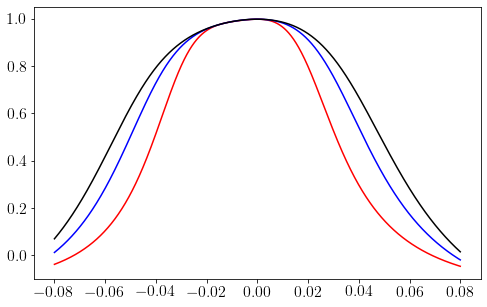

In [6]:
plt.plot(kr,SzMl20,'r')
plt.plot(kr,SzMl40,'b')
plt.plot(kr,SzMl60,'k')

In [76]:
kmax = 0.05
kr = np.linspace(-kmax,kmax, 300)
Dl=40
KX, KY = np.meshgrid(kr, kr)
w, v = np.linalg.eigh(getBMatrix(KX, KY, Dl, 0.0, -1))

In [77]:
Sz = np.diag([1,1,-1,-1])
SzM = np.einsum('ijk, kl, ijl->ij', np.conj(v[:,:,:,1]), Sz, v[:,:,:,1])
S0 = np.diag([1,1,1,1])
S0M = np.einsum('ijk, kl, ijl->ij', np.conj(v[:,:,:,1]), S0, v[:,:,:,1])
SzMl = np.real(SzM / S0M)

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


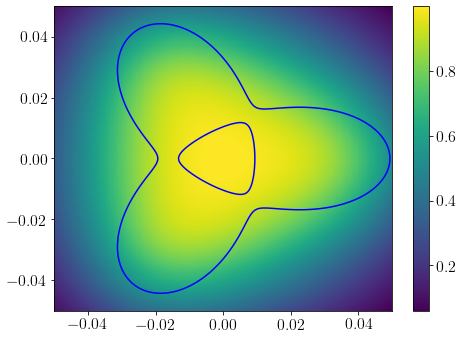

In [78]:
ml.rcParams['figure.figsize'] = (7.0, 5.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
mul=fdt[80](-0.6)
fig, ax= plt.subplots(1,1)
pc=ax.pcolormesh(KX,KY,SzMl)
ax.contour(KX, KY, w[:,:,1],[mul],colors='b')
#ax.set(adjustable='box', aspect='equal')
plt.colorbar(pc)
plt.tight_layout()
plt.show()

In [80]:
def func(k,th, Dt1, mu):
    w =np.linalg.eigvalsh(getBMatrix(k*np.cos(th), k*np.sin(th), Dt1, mu, -1))
    return w[1]

In [81]:
NFS = 100
thr = np.linspace(-np.pi,np.pi,NFS,endpoint=False)
ko = np.array([[th, optimize.newton(lambda k:func(k,th, Dl, mul), kmax)] for th in thr])
krx = ko[:,1]*np.cos(ko[:,0])
kry = ko[:,1]*np.sin(ko[:,0])

In [82]:
w, v = np.linalg.eigh(getBMatrix(krx, kry, Dl, 0.0, 1))

In [83]:
Sz = np.diag([1,1,-1,-1])
SzM = np.einsum('ik, kl, il->i', np.conj(v[:,:,1]), Sz, v[:,:,1])
S0 = np.diag([1,1,1,1])
S0M = np.einsum('ik, kl, il->i', np.conj(v[:,:,1]), S0, v[:,:,1])
SzMl = np.real(SzM / S0M)

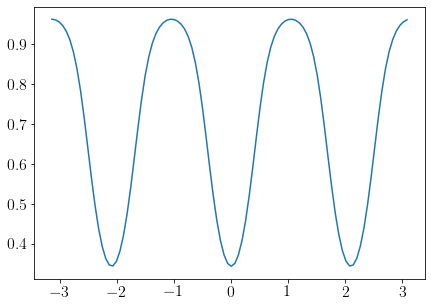

In [84]:
plt.plot(thr, SzMl)

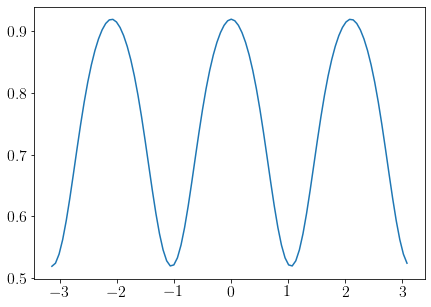

In [75]:
plt.plot(thr, SzMl)

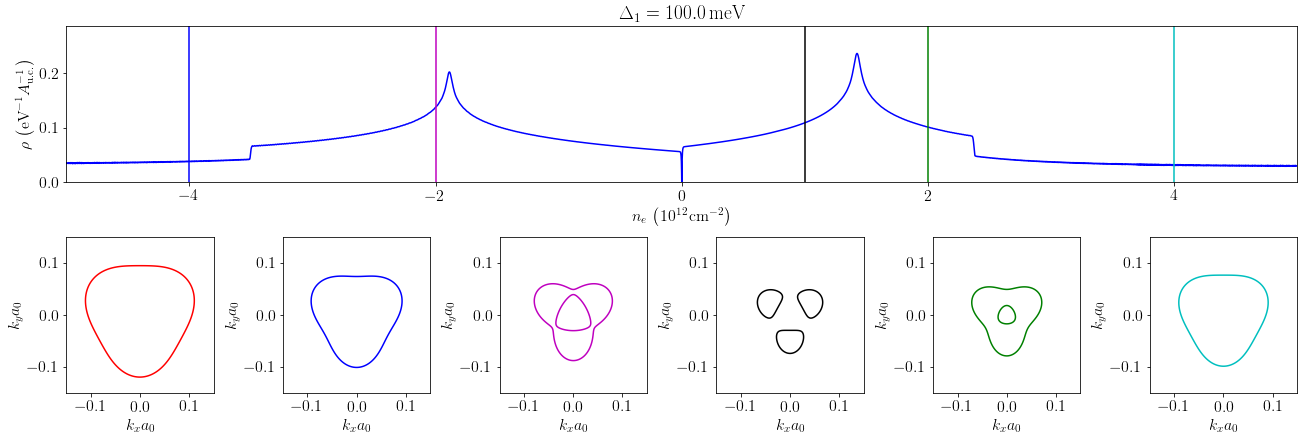

In [34]:
from matplotlib.gridspec import GridSpec
ml.rcParams['figure.figsize'] = (18.0, 6.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 6, figure=fig)

fdt = np.array([interp1d(nuT0[i], dos0[i], kind='linear') for i in range(len(nuT0))])
Au = np.sqrt(3) * a**2 / 2
Dl =100
nulist = [-6, -4, -2, 1, 2, 4]
ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
nul = np.arange(-5.0,5.0,0.001)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(nul, Au*0.1*fdt[ind](nul), 'b')
ax1.set_xlabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax1.set_ylabel(r'$\rho\, \left({\rm eV}^{-1} A^{-1}_{\rm u.c.}\right)$')
ax1.set_title('$\Delta_1=%.1f\,\mathrm{meV}$' %(Dl))
ax1.set_ylim([0.0,np.max(Au*0.1*fdt[ind](nul))+0.05])
ax1.set_xlim([nul[0], nul[-1]])


kr = np.linspace(-0.15,0.15, 300)
KX, KY = np.meshgrid(kr, kr)
w, v = np.linalg.eigh(getBMatrix(KX, KY, Dl, 0.0, 1))
mu1i = np.where(nulist[0]<=nuT0[ind])[0][0]
ax2 = fig.add_subplot(gs[1, 0])
ax2.contour(KX, KY, w[:,:,2 if nulist[0] > 0 else 1],[mul[mu1i]],colors='r')
ax2.set_xlabel(r'$k_xa_0$')
ax2.set_ylabel(r'$k_ya_0$')
ax1.plot([nulist[0],nulist[0]], [0,3],"r")

mu2i = np.where(nulist[1]<=nuT0[ind])[0][0]
ax3 = fig.add_subplot(gs[1, 1])
ax3.contour(KX, KY, w[:,:,2 if nulist[1] > 0 else 1],[mul[mu2i]],colors='b')
ax3.set_xlabel(r'$k_xa_0$')
ax3.set_ylabel(r'$k_ya_0$')
ax1.plot([nulist[1],nulist[1]], [0,3],"b")

mu3i = np.where(nulist[2]<=nuT0[ind])[0][0]
ax4 = fig.add_subplot(gs[1, 2])
ax4.contour(KX, KY, w[:,:,2 if nulist[2] > 0 else 1],[mul[mu3i]],colors='m')
ax4.set_xlabel(r'$k_xa_0$')
ax4.set_ylabel(r'$k_ya_0$')
ax1.plot([nulist[2],nulist[2]], [0,3],"m")

mu4i = np.where(nulist[3]<=nuT0[ind])[0][0]
ax5 = fig.add_subplot(gs[1, 3])
ax5.contour(KX, KY, w[:,:,2 if nulist[3] > 0 else 1],[mul[mu4i]],colors='k')
ax5.set_xlabel(r'$k_xa_0$')
ax5.set_ylabel(r'$k_ya_0$')
ax1.plot([nulist[3],nulist[3]], [0,3],"k")

mu5i = np.where(nulist[4]<=nuT0[ind])[0][0]
ax6 = fig.add_subplot(gs[1, 4])
ax6.contour(KX, KY, w[:,:,2 if nulist[4] > 0 else 1],[mul[mu5i]],colors='g')
ax6.set_xlabel(r'$k_xa_0$')
ax6.set_ylabel(r'$k_ya_0$')
ax1.plot([nulist[4],nulist[4]], [0,3],"g")

mu6i = np.where(nulist[5]<=nuT0[ind])[0][0]
ax6 = fig.add_subplot(gs[1, 5])
ax6.contour(KX, KY, w[:,:,2 if nulist[5] > 0 else 1],[mul[mu6i]],colors='c')
ax6.set_xlabel(r'$k_xa_0$')
ax6.set_ylabel(r'$k_ya_0$')
ax1.plot([nulist[5],nulist[5]], [0,3],"c")

plt.savefig("PhaseCut.png", dpi=300)

In [5]:
U = 30000
V = 0

In [24]:
dmu = 0.005
mul = np.arange(-120,120.0001,dmu)
xrescale = np.sqrt(3) * a**2 * 1E-4/ 2
with open('U%.1fKV%.1fKDataBilayerABC.npy' 
     % (U / 1000, np.abs(V) / 1000), 'rb') as f:
    a4 = np.load(f)
nuT0 = np.sum(a4[:,1:-1,:4], axis=2) / xrescale
nu10, nu20, nu30, nu40 = np.transpose(np.sort(a4[:,1:-1,:4], axis=2), (2,0,1)) / xrescale
dos0 = (np.sum(a4[:,2:,:4], axis=2)-np.sum(a4[:,0:-2,:4], axis=2)) / (2*dmu*xrescale)

In [21]:
dmu = 0.005
mul = np.arange(-120,120.0001,dmu)
xrescale = np.sqrt(3) * a**2 * 1E-4/ 2
with open('/home/aghazary/Documents/StonerBilayerData/'+'U%.1fKV%.1fKDataBilayerABCDOS4.npy' 
     % (U / 1000, np.abs(V) / 1000), 'rb') as f:
    a4 = np.load(f)
nuT = np.sum(a4[:,1:-1,:4], axis=2) / xrescale
nu1, nu2, nu3, nu4 = np.transpose(np.sort(a4[:,1:-1,:4], axis=2), (2,0,1)) / xrescale
dos = (np.sum(a4[:,2:,:4], axis=2)-np.sum(a4[:,0:-2,:4], axis=2)) / (2*dmu*xrescale)

In [7]:
dmu = 0.005
mul = np.arange(-120,120.0001,dmu)
xrescale = np.sqrt(3) * a**2 * 1E-4/ 2
with open('/home/aghazary/Documents/StonerBilayerData/'+'U%.1fKV%.1fKDataBilayerABCDOSEps2.npy' 
     % (U / 1000, np.abs(V) / 1000), 'rb') as f:
    a4 = np.load(f)
nuT1 = np.sum(a4[:,1:-1,:4], axis=2) / xrescale
nu11, nu21, nu31, nu41 = np.transpose(np.sort(a4[:,1:-1,:4], axis=2), (2,0,1)) / xrescale
dos1 = (np.sum(a4[:,2:,:4], axis=2)-np.sum(a4[:,0:-2,:4], axis=2)) / (2*dmu*xrescale)

In [24]:
from scipy.signal import savgol_filter
doso = dos.copy()
for i in range(len(doso)):
    dos[i] = savgol_filter(doso[i], 15, 3)
    
doso = dos1.copy()
for i in range(len(doso)):
    dos1[i] = savgol_filter(doso[i], 15, 3)

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  from ipykernel import kernelapp as app


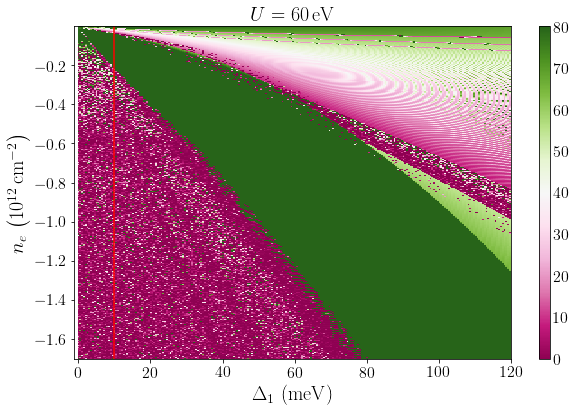

In [25]:
ml.rcParams['figure.figsize'] = (9.0, 6.0)
fig, ax1 = plt.subplots()
fdt = np.array([interp1d(nuT[i], dos[i], kind='linear') for i in range(len(nuT))])
nul = np.arange(-1.7,0.0,0.001)
Dfl = np.arange(0,120+0.1,0.5)
ind = np.where(np.abs(np.abs(Dfl[-1])-Dlist)<0.01)[0][0]
Au = np.sqrt(3) * a**2 / 2
Cpl = (10 / Au)*np.array([1/(0.0002+fdt[i](nul)) for i in range(ind+1)])
vmax = np.amax(Cpl)
vmin = np.amin(Cpl)
cmap = plt.get_cmap('PiYG')
xi, yi = np.meshgrid(Dfl,nul)
vml = 0.0
vxl = 80.0
pc =ax1.pcolormesh(xi,yi,np.transpose(Cpl),cmap=cmap,vmin=vml,vmax=vxl,rasterized=True)
ax1.plot([10,10], [-2.0, 0.0], 'r')
ax1.set_xlim([Dfl[0]-1.0,Dfl[-1]])
ax1.set_ylim([nul[0],nul[-1]])
ax1.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
ax1.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=20)
ax1.set_title(r'$U=60\,\mathrm{eV}$',fontsize=20)
#cbaxes = fig.add_axes([0.86, 0.78, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="vertical",aspect=30)
cbar.ax.tick_params(size=0)
plt.tight_layout()
#plt.savefig('PhaseAB.png', dpi=300)

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


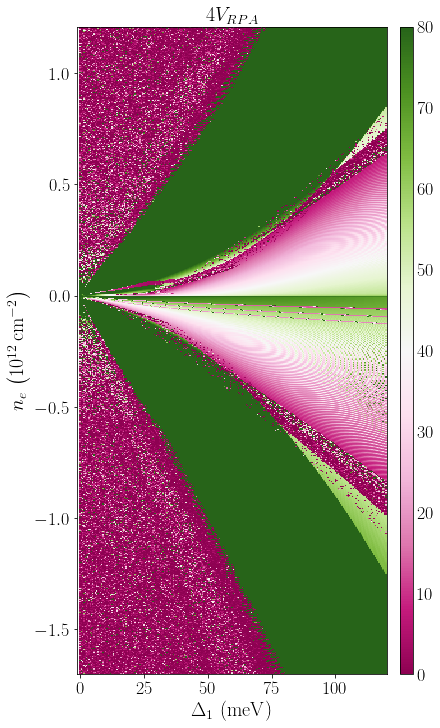

In [37]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=18)
ml.rcParams['figure.figsize'] = (6.0, 10.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
Dlist =np.arange(0,120.1,0.5)
ax1 = fig.add_subplot(gs[0, 0])
fdt = np.array([interp1d(nuT[i], dos[i], kind='linear') for i in range(len(nuT0))])
nul = np.arange(-1.7,1.21,0.001)
Dfl = np.arange(0,120+0.1,0.5)
ind = np.where(np.abs(np.abs(Dfl[-1])-Dlist)<0.01)[0][0]
Au = np.sqrt(3) * a**2 / 2
Cpl = (10 / Au)*np.array([1/(0.0002+fdt[i](nul)) for i in range(ind+1)])
vmax = np.amax(Cpl)
vmin = np.amin(Cpl)
cmap = plt.get_cmap('PiYG')
xi, yi = np.meshgrid(Dfl,nul)
vml = 0.0
vxl = 80.0
pc =ax1.pcolormesh(xi,yi,np.transpose(Cpl),cmap=cmap,vmin=vml,vmax=vxl,rasterized=True)
ax1.set_xlim([Dfl[0]-1.0,Dfl[-1]])
ax1.set_ylim([nul[0],nul[-1]])
ax1.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
ax1.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=20)
ax1.set_title(r'$4V_{RPA}$',fontsize=20)
#cbaxes = fig.add_axes([0.86, 0.78, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="vertical",aspect=30)
cbar.ax.tick_params(size=0)
plt.savefig("BilayerPhase.pdf", dpi=300)

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of th

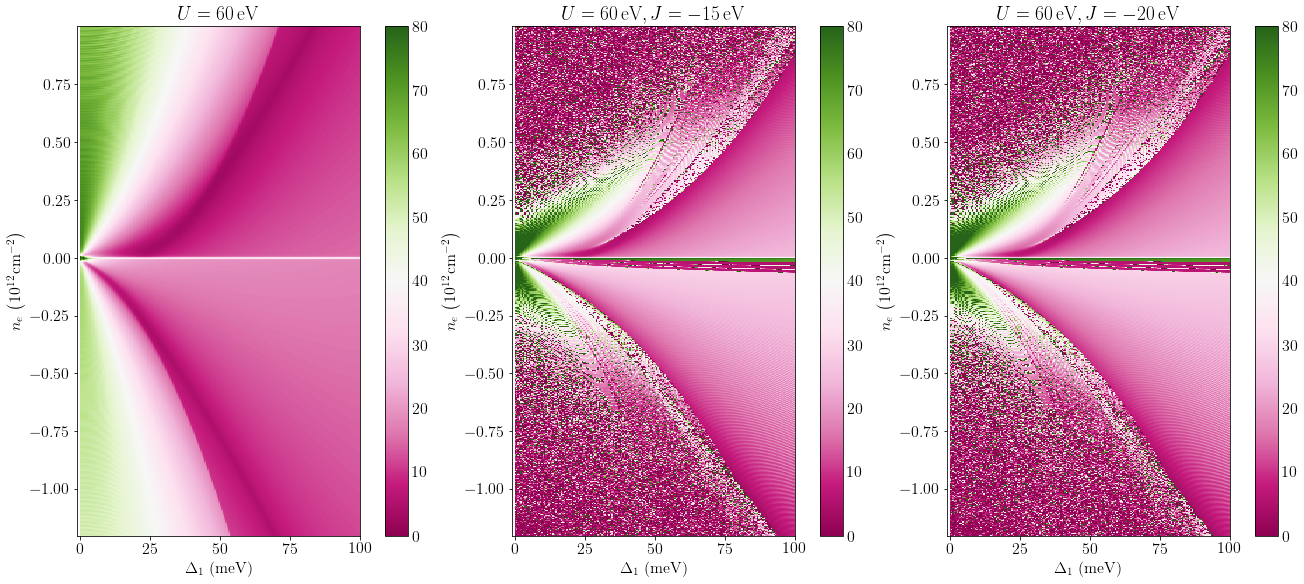

In [10]:
from matplotlib.gridspec import GridSpec
ml.rcParams['figure.figsize'] = (18.0, 8.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
fdt = np.array([interp1d(nuT0[i], dos0[i], kind='linear') for i in range(len(nuT0))])
nul = np.arange(-1.2,1.0,0.001)
Dfl = np.arange(0,100+0.1,0.5)
ind = np.where(np.abs(np.abs(Dfl[-1])-Dlist)<0.01)[0][0]
Au = np.sqrt(3) * a**2 / 2
Cpl = (10 / Au)*np.array([1/(0.0002+fdt[i](nul)) for i in range(ind+1)])
vmax = np.amax(Cpl)
vmin = np.amin(Cpl)
cmap = plt.get_cmap('PiYG')
xi, yi = np.meshgrid(Dfl,nul)
vml = 0.0
vxl = 80.0
pc =ax1.pcolormesh(xi,yi,np.transpose(Cpl),cmap=cmap,vmin=vml,vmax=vxl,rasterized=True)
ax1.set_xlim([Dfl[0]-1.0,Dfl[-1]])
ax1.set_ylim([nul[0],nul[-1]])
ax1.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$')
ax1.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax1.set_title(r'$U=60\,\mathrm{eV}$')
#cbaxes = fig.add_axes([0.86, 0.78, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="vertical",aspect=50)
cbar.ax.tick_params(size=0)


ax2 = fig.add_subplot(gs[0, 1])
fdt = np.array([interp1d(nuT[i], dos[i], kind='linear') for i in range(len(nuT))])
Cpl = (10 / Au)*np.array([1/(0.0002+fdt[i](nul)) for i in range(ind+1)])
vmax = np.amax(Cpl)
vmin = np.amin(Cpl)
cmap = plt.get_cmap('PiYG')
xi, yi = np.meshgrid(Dfl,nul)
vml = 0.0
vxl = 80.0
pc =ax2.pcolormesh(xi,yi,np.transpose(Cpl),cmap=cmap,vmin=vml,vmax=vxl,rasterized=True)
ax2.set_xlim([Dfl[0]-1.0,Dfl[-1]])
ax2.set_ylim([nul[0],nul[-1]])
ax2.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$')
ax2.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax2.set_title(r'$U=60\,\mathrm{eV},J=-15\,\mathrm{eV}$')
#cbaxes = fig.add_axes([0.86, 0.78, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="vertical",aspect=50)
cbar.ax.tick_params(size=0)

ax3 = fig.add_subplot(gs[0, 2])
fdt = np.array([interp1d(nuT1[i], dos1[i], kind='linear') for i in range(len(nuT1))])
Cpl = (10 / Au)*np.array([1/(0.0002+fdt[i](nul)) for i in range(ind+1)])
vmax = np.amax(Cpl)
vmin = np.amin(Cpl)
cmap = plt.get_cmap('PiYG')
xi, yi = np.meshgrid(Dfl,nul)
vml = 0.0
vxl = 80.0
pc =ax3.pcolormesh(xi,yi,np.transpose(Cpl),cmap=cmap,vmin=vml,vmax=vxl,rasterized=True)
ax3.set_xlim([Dfl[0]-1.0,Dfl[-1]])
ax3.set_ylim([nul[0],nul[-1]])
ax3.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$')
ax3.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax3.set_title(r'$U=60\,\mathrm{eV}, J=-20\,\mathrm{eV}$')
#cbaxes = fig.add_axes([0.86, 0.78, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="vertical",aspect=50)
cbar.ax.tick_params(size=0)

#plt.savefig('PhaseDiagramSymmetryBreaking.png', dpi=300)

In [15]:
dmu = 0.002
mul0 = np.arange(-150,150.0001,dmu)
mul0 = mul0[1:-1]
fend = np.array([interp1d(nuT0[i]/4, mul0, kind='linear') for i in range(len(nuT0))])

In [27]:
from matplotlib.gridspec import GridSpec
def PlotDensFermiNu(Dl, NuRange, Nu1, Nu2, Nu3):
    ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
    ml.rcParams['figure.figsize'] = (20.0, 10.0)
    ml.rcParams['contour.negative_linestyle']= 'solid'
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(3, 6, figure=fig)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.set_xlim(NuRange)
    ymin = nu1[ind,np.where(NuRange[0]>nuT[ind])[0][-1]]-0.3
    ymax = nu1[ind,np.where(NuRange[-1]<nuT[ind])[0][0]]+0.8
    ax1.set_ylim(ymin,ymax)
    ax1.set_xlabel(r'$\nu_T,\, 10^{12} {\rm cm}^{-2}$',fontsize=20)
    ax1.set_ylabel(r'$\nu,\, 10^{12} {\rm cm}^{-2}$',fontsize=20)
    ax1.set_title('$\Delta_1=%.1f\,\mathrm{meV},\, U=%.1f\,\mathrm{eV}, J=-%.1f\,\mathrm{eV}$' %(Dl,U/1000,V/1000),fontsize=20)
    ax1.plot(nuT[ind], nu1[ind],"o",label=r"$\nu_1$")
    ax1.plot(nuT[ind], nu2[ind],"+",label=r"$\nu_2$")
    ax1.plot(nuT[ind], nu3[ind],"x",label=r"$\nu_3$")
    ax1.plot(nuT[ind], nu4[ind],"*",label=r"$\nu_4$")
    ax1.plot([Nu1,Nu1], [ymin,ymax],"r")
    ax1.plot([Nu2,Nu2], [ymin,ymax],"g")
    ax1.plot([Nu3,Nu3], [ymin,ymax],"b")
    ax1.legend()
    kr = np.linspace(-0.12,0.12, 300)
    KX, KY = np.meshgrid(kr, kr)
    w, v = np.linalg.eigh(getBMatrix(KX, KY, Dl, 0.0, 1))
    mu1i = np.where(Nu1<=nuT[ind])[0][0]
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.contour(KX, KY, w[:,:,2 if nu1[ind,mu1i] > 0 else 1],[fend[ind](nu1[ind,mu1i])],colors='r')
    ax2.set_xlabel(r'$k_x$',fontsize=20)
    ax2.set_ylabel(r'$k_y$',fontsize=20)
    ax2.set_title(r'$\nu_1=%.2f $' %(nu1[ind,mu1i]),fontsize=20)
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.contour(KX, KY, w[:,:,2 if nu2[ind,mu1i] > 0 else 1],[fend[ind](nu2[ind,mu1i])],colors='r')
    ax3.set_xlabel(r'$k_x$',fontsize=20)
    ax3.set_ylabel(r'$k_y$',fontsize=20)
    ax3.set_title(r'$\nu_2=%.2f $' %(nu2[ind,mu1i]),fontsize=20)
    ax4 = fig.add_subplot(gs[2, 0])
    ax4.contour(KX, KY, w[:,:,2 if nu3[ind,mu1i] > 0 else 1],[fend[ind](nu3[ind,mu1i])],colors='r')
    ax4.set_xlabel(r'$k_x$',fontsize=20)
    ax4.set_ylabel(r'$k_y$',fontsize=20)
    ax4.set_title(r'$\nu_3=%.2f $' %(nu3[ind,mu1i]),fontsize=20)
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.contour(KX, KY, w[:,:,2 if nu4[ind,mu1i] > 0 else 1],[fend[ind](nu4[ind,mu1i])],colors='r')
    ax5.set_xlabel(r'$k_x$',fontsize=20)
    ax5.set_ylabel(r'$k_y$',fontsize=20)
    ax5.set_title(r'$\nu_4=%.2f $' %(nu4[ind,mu1i]),fontsize=20)
    mu2i = np.where(Nu2<=nuT[ind])[0][0]
    ax2 = fig.add_subplot(gs[1, 2])
    ax2.contour(KX, KY, w[:,:,2 if nu1[ind,mu2i] > 0 else 1],[fend[ind](nu1[ind,mu2i])],colors='g')
    ax2.set_xlabel(r'$k_x$',fontsize=20)
    ax2.set_ylabel(r'$k_y$',fontsize=20)
    ax2.set_title(r'$\nu_1=%.2f $' %(nu1[ind,mu2i]),fontsize=20)
    ax3 = fig.add_subplot(gs[1, 3])
    ax3.contour(KX, KY, w[:,:,2 if nu2[ind,mu2i] > 0 else 1],[fend[ind](nu2[ind,mu2i])],colors='g')
    ax3.set_xlabel(r'$k_x$',fontsize=20)
    ax3.set_ylabel(r'$k_y$',fontsize=20)
    ax3.set_title(r'$\nu_2=%.2f $' %(nu2[ind,mu2i]),fontsize=20)
    ax4 = fig.add_subplot(gs[2, 2])
    ax4.contour(KX, KY, w[:,:,2 if nu3[ind,mu2i] > 0 else 1],[fend[ind](nu3[ind,mu2i])],colors='g')
    ax4.set_xlabel(r'$k_x$',fontsize=20)
    ax4.set_ylabel(r'$k_y$',fontsize=20)
    ax4.set_title(r'$\nu_3=%.2f $' %(nu3[ind,mu2i]),fontsize=20)
    ax5 = fig.add_subplot(gs[2, 3])
    ax5.contour(KX, KY, w[:,:,2 if nu4[ind,mu2i] > 0 else 1],[fend[ind](nu4[ind,mu2i])],colors='g')
    ax5.set_xlabel(r'$k_x$',fontsize=20)
    ax5.set_ylabel(r'$k_y$',fontsize=20)
    ax5.set_title(r'$\nu_4=%.2f $' %(nu4[ind,mu2i]),fontsize=20)
    mu3i = np.where(Nu3<=nuT[ind])[0][0]
    ax2 = fig.add_subplot(gs[1, 4])
    ax2.contour(KX, KY, w[:,:,2 if nu1[ind,mu3i] > 0 else 1],[fend[ind](nu1[ind,mu3i])],colors='b')
    ax2.set_xlabel(r'$k_x$',fontsize=20)
    ax2.set_ylabel(r'$k_y$',fontsize=20)
    ax2.set_title(r'$\nu_1=%.2f $' %(nu1[ind,mu3i]),fontsize=20)
    ax3 = fig.add_subplot(gs[1, 5])
    ax3.contour(KX, KY, w[:,:,2 if nu2[ind,mu3i] > 0 else 1],[fend[ind](nu2[ind,mu3i])],colors='b')
    ax3.set_xlabel(r'$k_x$',fontsize=20)
    ax3.set_ylabel(r'$k_y$',fontsize=20)
    ax3.set_title(r'$\nu_2=%.2f $' %(nu2[ind,mu3i]),fontsize=20)
    ax4 = fig.add_subplot(gs[2, 4])
    ax4.contour(KX, KY, w[:,:,2 if nu3[ind,mu3i] > 0 else 1],[fend[ind](nu3[ind,mu3i])],colors='b')
    ax4.set_xlabel(r'$k_x$',fontsize=20)
    ax4.set_ylabel(r'$k_y$',fontsize=20)
    ax4.set_title(r'$\nu_3=%.2f $' %(nu3[ind,mu3i]),fontsize=20)
    ax5 = fig.add_subplot(gs[2, 5])
    ax5.contour(KX, KY, w[:,:,2 if nu4[ind,mu3i] > 0 else 1],[fend[ind](nu4[ind,mu3i])],colors='b')
    ax5.set_xlabel(r'$k_x$',fontsize=20)
    ax5.set_ylabel(r'$k_y$',fontsize=20)
    ax5.set_title(r'$\nu_4=%.2f $' %(nu4[ind,mu3i]),fontsize=20)
    #plt.savefig("PhaseCuts.png", dpi=300)

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: No contour levels were found within the data range.


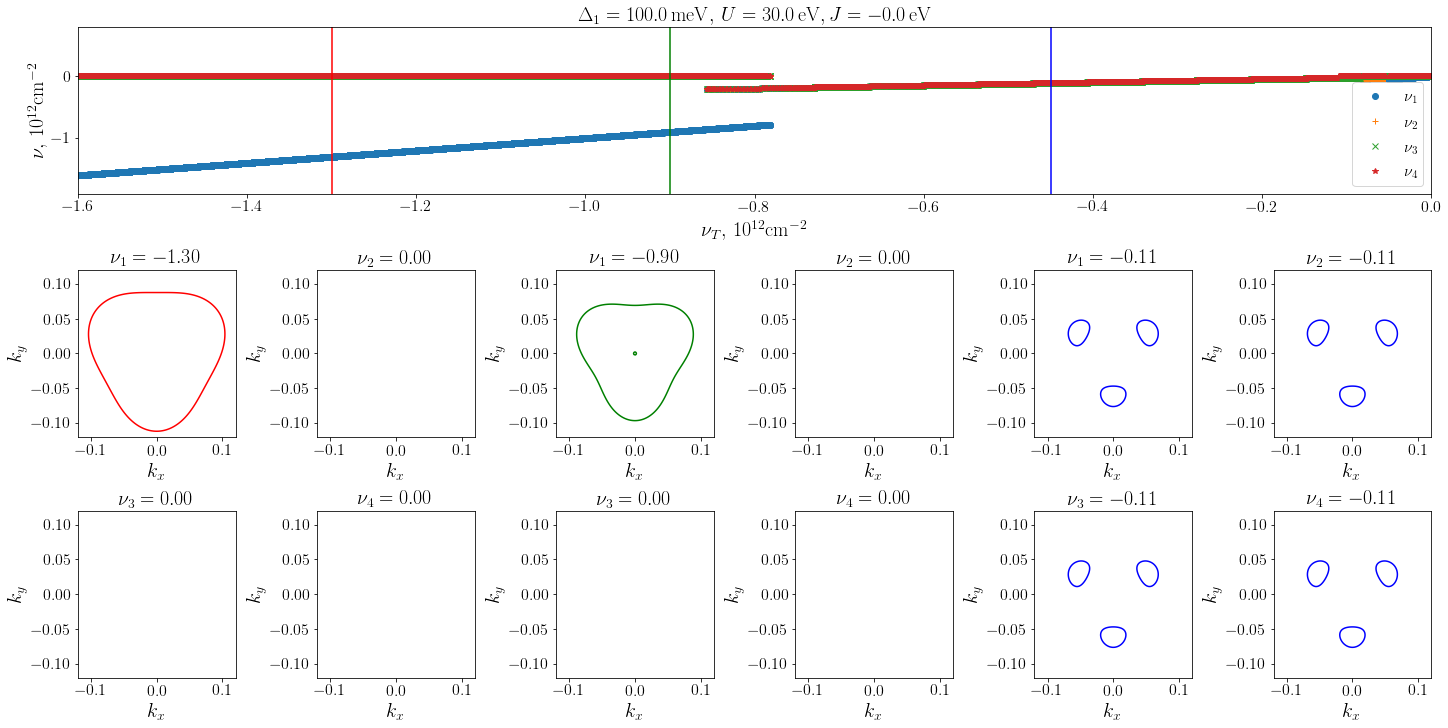

In [29]:
PlotDensFermiNu(100, [-1.6, 0.0], -1.3, -0.9, -0.45)

(0.0, 100.0)

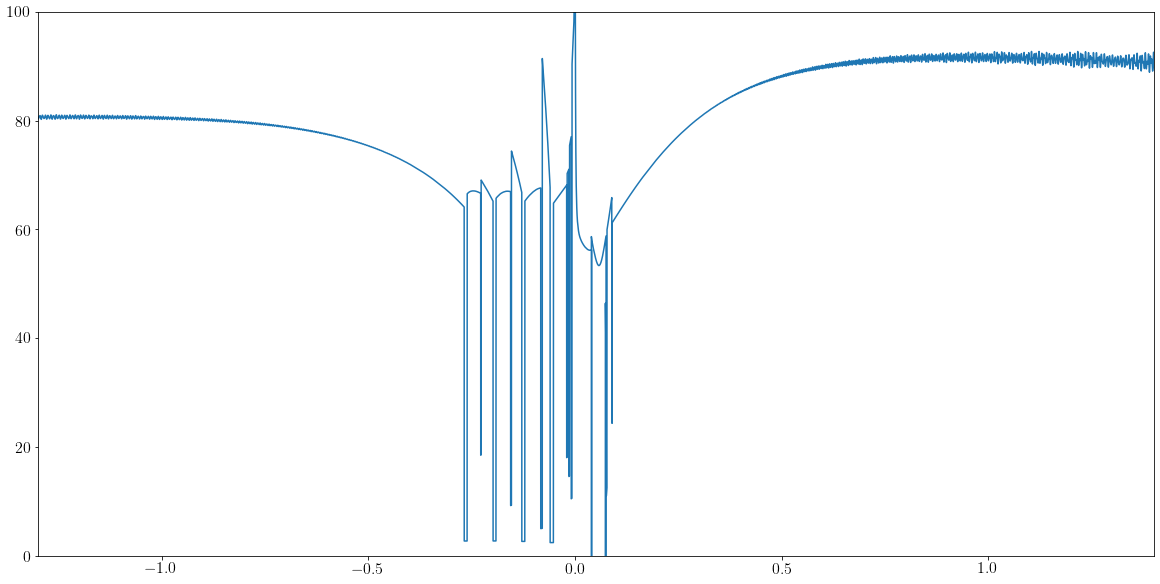

In [89]:
Dl = 10
ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
plt.plot(nuT[ind],(10 / Au)/(0.0002+dos[ind]))
plt.xlim([-1.3,1.4])
plt.ylim([0,100.0])